In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from scipy import stats

import os
import math

In [2]:
## Move to correct folder for server.  Can remove before sending
os.chdir('/home/poblivsig/Dropbox/horses2')
print(os.getcwd())

/home/poblivsig/Dropbox/horses2


In [3]:
## Open the pre-processed csv
df = pd.read_csv('data/winequality-red.csv')
print(df.shape)
# df = df.drop(df.index[0:140000], 0)
print(df.shape)

(1599, 12)
(1599, 12)


In [4]:
## Get info about horses
print(f'Shape\n\n{df.shape}')
print(f'Columns\n\n{df.columns}')
print(f'dtypes\n\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n\n{df.describe()}')
print(df.sample(n=1))
pd.set_option('display.max_columns', 5)

Shape

(1599, 12)
Columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Description

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0

/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

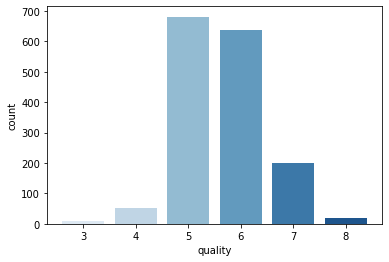

In [17]:
## (1) Count the different quality values
sns.countplot(df['quality'],
              palette='Blues',
              label="Quality Count", )
plt.plot()

[]

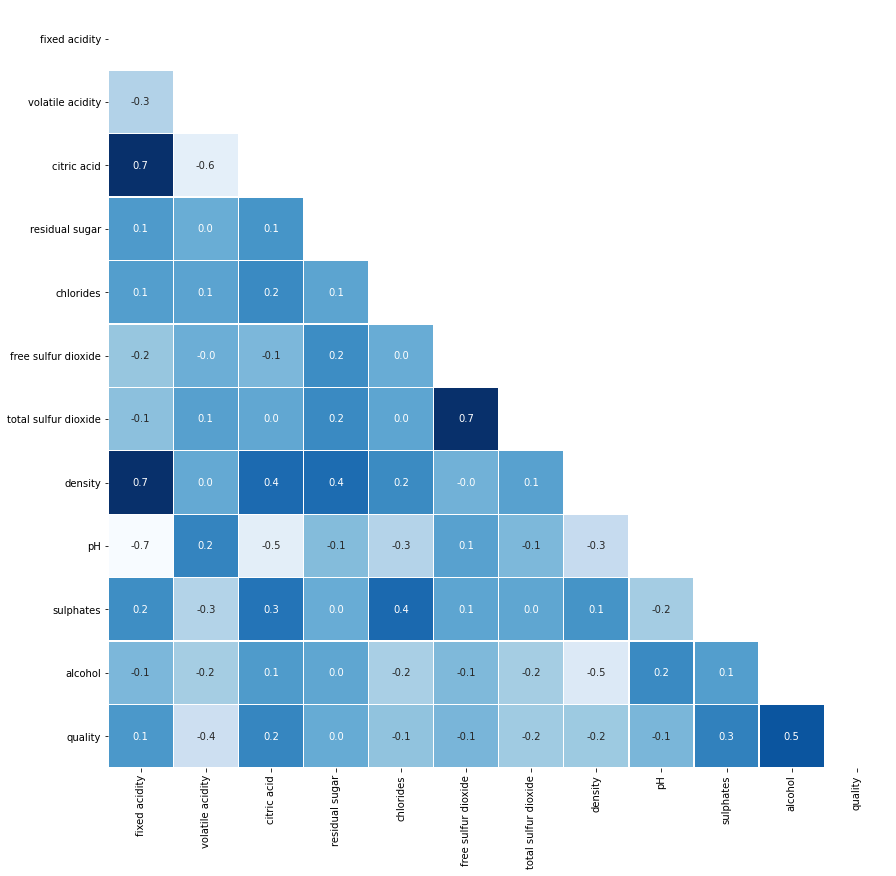

In [15]:
# Build a correlation matrix to find the attributes that correlate the most
f,ax = plt.subplots(figsize=(14, 14))
conf_matrix = np.triu(df.corr())
sns.heatmap(df.corr(),
            annot=True,
            cbar=0,
            linewidths=.3,
            fmt='.1f',
            cmap='Blues',
            ax=ax,
            mask=conf_matrix)
plt.plot()


###############################
# Build boxplots for the most correlated against the different quality levels (3)

## Fixed acidity
plot = sns.boxplot(x='quality', y='fixed acidity', data=df, showfliers=False)
plot.set_title('Quality vs. Fixed Acidity')
plt.plot()

In [ ]:
## Citric Acid
plot = sns.boxplot(x='quality', y='citric acid', data=df, showfliers=False)
plot.set_title('Quality vs. Fixed Acidity')
plt.plot()


[]

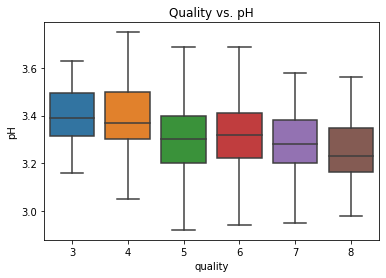

In [23]:
## pH
plot = sns.boxplot(x='quality', y='pH', data=df, showfliers=False)
plot.set_title('Quality vs. pH')
plt.plot()

[]

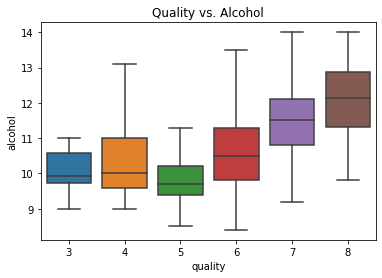

In [25]:
## Alcohol
plot = sns.boxplot(x='quality', y='alcohol', data=df, showfliers=False)
plot.set_title('Quality vs. Alcohol')
plt.plot()

In [ ]:
## Density
plot = sns.boxplot(x='quality', y='density', data=df, showfliers=False)
plot.set_title('Quality vs. Fixed Acidity')
plt.plot()



[]

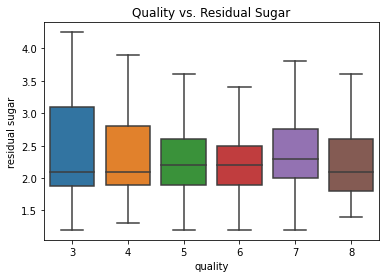

In [27]:
## Residual Sugar
plot = sns.boxplot(x='quality', y='residual sugar', data=df, showfliers=False)
plot.set_title('Quality vs. Residual Sugar')
plt.plot()

In [29]:
## Split the data up.
y = df['quality']
X = df.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, stratify=y, random_state = 17)
print(df.shape)

(1599, 12)


In [32]:
# Scale the features (attributes)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
# Logistical Regression
lr = LogisticRegression(random_state = 0, max_iter=200)
lr.fit(X_train, y_train)

print(f'Logistic Regression training accuracy: {lr.score(X_train, y_train)}')

Logistic Regression training accuracy: 0.6110531803962461


In [48]:
#Using DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)
print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))


[3]Decision Tree Classifier Training Accuracy: 1.0


In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model[{}] Testing Accuracy = "{}"'.format(tree, (TP + TN) / (TP + TN + FN + FP)))
# print(f'Testing Accuracy = {(TP + TN) / (TP + TN + FN + FP)}')
print()# Print a new line

[[  0   0   4   0   0   0]
 [  0   0  12   8   1   0]
 [  0   1 197  73   2   0]
 [  0   0  86 154  15   0]
 [  0   0   5  55  20   0]
 [  0   0   0   4   3   0]]
Model[DecisionTreeClassifier(criterion='entropy', random_state=0)] Testing Accuracy = "nan"



<ipython-input-50-6a9b1d99f995>:11: RuntimeWarning: invalid value encountered in long_scalars
  print('Model[{}] Testing Accuracy = "{}"'.format(tree, (TP + TN) / (TP + TN + FN + FP)))
